In [1]:
!pip install yfinance scikit-learn matplotlib pandas --quiet

import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Select a stock, e.g., Apple
ticker = 'AAPL'
data = yf.download(ticker, start='2022-01-01', end='2024-12-31')

# Display the first 5 rows
data.head()

C:\Users\ztech.pk\AppData\Local\Temp\ipykernel_1788\2480431043.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.645630,179.499559,174.425125,174.542902,104487900
2022-01-04,176.378357,179.558473,175.809076,179.254206,99310400
2022-01-05,171.686707,176.839663,171.411883,176.290017,94537600
2022-01-06,168.820694,172.059699,168.467348,169.507752,96904000
2022-01-07,168.987534,170.921120,167.868606,169.694226,86709100


In [3]:
# Use Open, High, Low, Volume to predict Close
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Close']

# Split the data (time series - no shuffle)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

In [4]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [5]:
# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

C:\Users\ztech.pk\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Linear Regression MSE: 1.7126747820644768


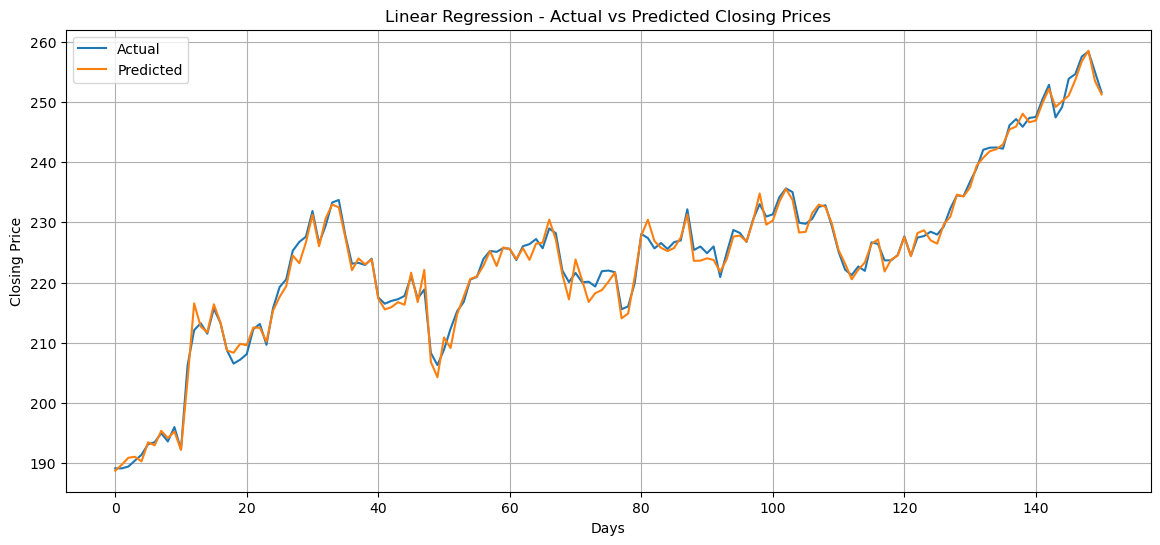

Random Forest MSE: 993.3236907510603


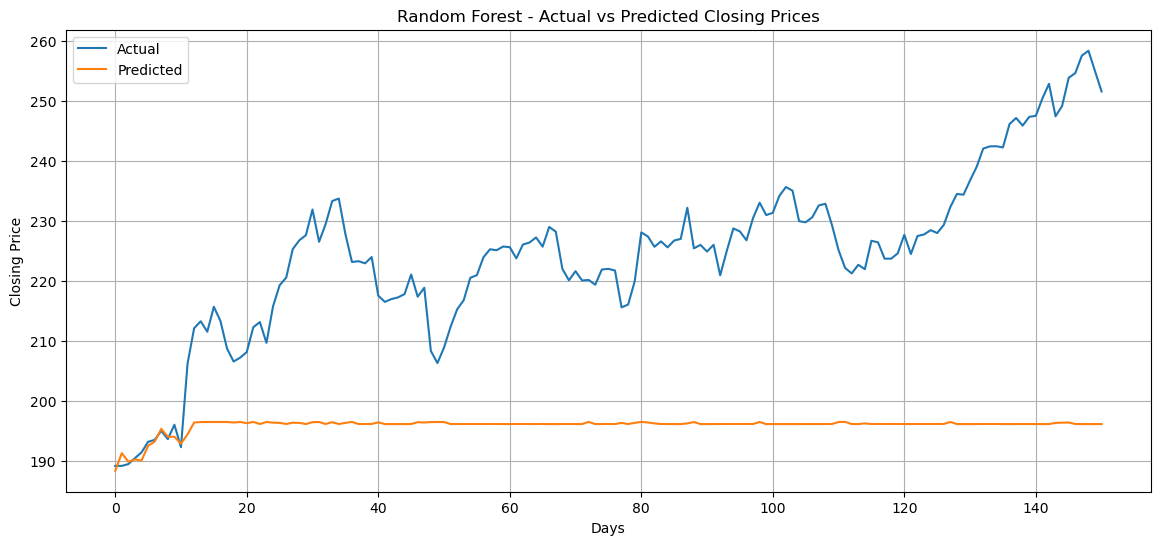

In [6]:
# Function to plot predictions
def plot_predictions(actual, predicted, title):
    plt.figure(figsize=(14, 6))
    plt.plot(actual.values, label='Actual')
    plt.plot(predicted, label='Predicted')
    plt.title(title)
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Evaluate and plot
print("Linear Regression MSE:", mean_squared_error(y_test, lr_preds))
plot_predictions(y_test, lr_preds, 'Linear Regression - Actual vs Predicted Closing Prices')

print("Random Forest MSE:", mean_squared_error(y_test, rf_preds))
plot_predictions(y_test, rf_preds, 'Random Forest - Actual vs Predicted Closing Prices')

In [7]:
# Predict next day's closing price
latest_data = data[['Open', 'High', 'Low', 'Volume']].iloc[-1].values.reshape(1, -1)
next_day_prediction = rf_model.predict(latest_data)
print(f"📌 Predicted next day closing price for {ticker}: ${next_day_prediction[0]:.2f}")

📌 Predicted next day closing price for AAPL: $196.08
